In [7]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import pandas as pd
from matplotlib import pyplot as plt

In [8]:
bertimbau_df = pd.read_csv("best_model_preds_last_10%.csv")
bertimbau_df

,Unnamed: 0,Id,labels,predictions
0,918,es007CVMTD,2,2
1,919,ru022CVMTF_2,2,2
2,920,fr034CVMTF,2,2
3,921,de037CVSTF,4,4
4,922,de013CVITI,0,0
...,...,...,...,...
97,1015,zh005CVATF,3,3
98,1016,en056CVITI_1,0,0
99,1017,es048CVETD,1,0
100,1018,zh036CAE1TF,1,1


In [25]:
gpt_df = pd.read_csv("portulan_clarin_predictions_cople_last_10%.csv")
gpt_df

,Unnamed: 0,Id,predictions,labels
0,0,es007CVMTD,1,2
1,1,ru022CVMTF_2,2,2
2,2,fr034CVMTF,4,2
3,3,de037CVSTF,4,4
4,4,de013CVITI,0,0
...,...,...,...,...
97,97,es048CVETD,0,1
98,98,zh036CAE1TF,0,1
99,99,es014CAMTF,2,2
100,100,zh129CAMTF,2,2


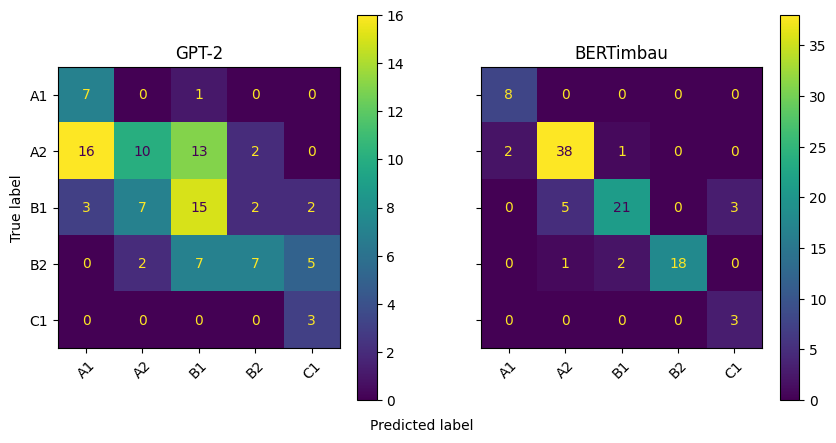

In [75]:
f, axes = plt.subplots(1, 2, figsize=(10, 5), sharey='row')
models = ["GPT-2", "BERTimbau"]
conf_matrices = {models[0]: confusion_matrix(y_true=gpt_df["labels"], y_pred=gpt_df["predictions"]),
              models[1]: confusion_matrix(y_true=bertimbau_df["labels"], y_pred=bertimbau_df["predictions"])}
for i, model in enumerate(models):
    conf_matrix = conf_matrices[model]
    disp = ConfusionMatrixDisplay(conf_matrix,
                                  display_labels=["A1", "A2", "B1", "B2", "C1"])
    disp.plot(ax=axes[i], xticks_rotation=45)
    disp.ax_.set_title(model)
#     disp.im_.colorbar.remove()
    disp.ax_.set_xlabel('')
    
    if i!=0:
        disp.ax_.set_ylabel('')

f.text(0.4375, 0.05, 'Predicted label', ha='left')
# plt.subplots_adjust(wspace=0.1, hspace=0.1)
# f.tight_layout()
# plt.subplot_tool()
plt.show()

In [32]:
for i, j in enumerate(models):
    print(i, j)

0 GPT-2
1 BERTimbau


/tmp/ipykernel_127527/3421513362.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['', 'A1', 'A2', 'B1', 'B2', 'C1', 'C2'])
/tmp/ipykernel_127527/3421513362.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['', 'A1', 'A2', 'B1', 'B2', 'C1', 'C2'])


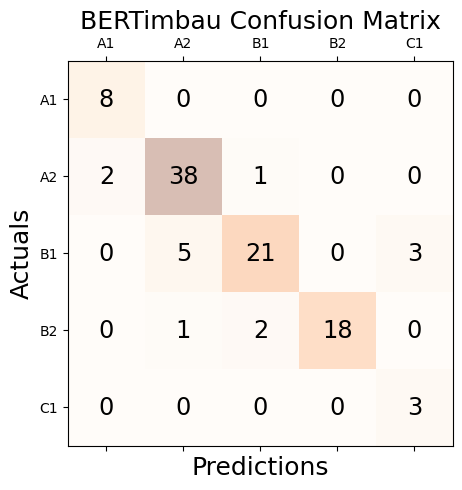

confusion matrix:
[[ 8  0  0  0  0]
 [ 2 38  1  0  0]
 [ 0  5 21  0  3]
 [ 0  1  2 18  0]
 [ 0  0  0  0  3]]


In [3]:
conf_matrix = confusion_matrix(y_true=preds_df["labels"], y_pred=preds_df["predictions"])

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

ax.set_xticklabels(['', 'A1', 'A2', 'B1', 'B2', 'C1', 'C2'])
ax.set_yticklabels(['', 'A1', 'A2', 'B1', 'B2', 'C1', 'C2'])
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('BERTimbau Confusion Matrix', fontsize=18)
plt.show()
print(f"confusion matrix:\n{conf_matrix}")

,Unnamed: 0,Id,Predictions,labels
0,0,es007CVMTD,1,2
1,1,ru022CVMTF_2,2,2
2,2,fr034CVMTF,4,2
3,3,de037CVSTF,4,4
4,4,de013CVITI,0,0
...,...,...,...,...
97,97,es048CVETD,0,1
98,98,zh036CAE1TF,0,1
99,99,es014CAMTF,2,2
100,100,zh129CAMTF,2,2


/tmp/ipykernel_127527/2373891709.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['', 'A1', 'A2', 'B1', 'B2', 'C1', 'C2'])
/tmp/ipykernel_127527/2373891709.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['', 'A1', 'A2', 'B1', 'B2', 'C1', 'C2'])


TypeError: 'Text' object is not callable

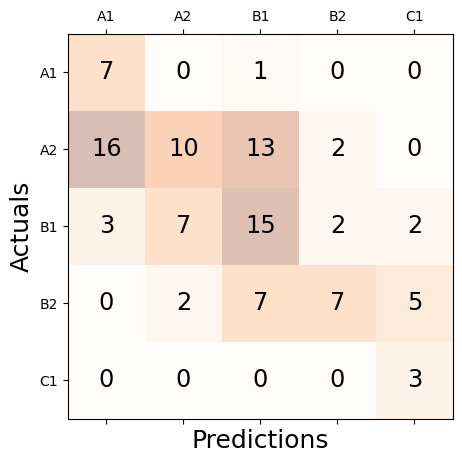

In [6]:
conf_matrix = confusion_matrix(y_true=preds_df["labels"], y_pred=preds_df["Predictions"])

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

ax.set_xticklabels(['', 'A1', 'A2', 'B1', 'B2', 'C1', 'C2'])
ax.set_yticklabels(['', 'A1', 'A2', 'B1', 'B2', 'C1', 'C2'])
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
ax.title('GPT-2 Confusion Matrix', fontsize=18)
plt.show()
print(f"confusion matrix:\n{conf_matrix}")